In [141]:
import pandas as pd

## Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов в файле “horse_data.names” , загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [142]:
with open('horse_data.names') as f:
    print(f.read())

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

7. Attribute Information:

  1:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

  2:  Age
          1 = Adult horse
          2 = Young (< 6 months)

  3:  Hospital Number
          - numeric id
          - the case number assi

In [143]:
# считываем файл, оставляя только необходимые колонки
# и заменяя знак ? на пустые значения
df = pd.read_csv('horse_data.csv',
       na_values='?', header=None,
       usecols=[0, 1, 3, 4, 5, 6, 10, 22],
       names=['surgery?','Age','rectal temperature',
              'pulse','respiratory rate',
              'temperature of extremities','pain','outcome'])
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [144]:
# имена колонок приведем к стандартному виду
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,surgery?,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


## Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.


In [145]:
# некоторые поля содержат по несколько дискретных значений
# поэтому их удобнее рассматривать как категориальные
df['surgery?'] = pd.Categorical(df['surgery?'])
df['age'] = pd.Categorical(df['age'])
df['temperature_of_extremities'] = pd.Categorical(df['temperature_of_extremities'])
df['pain'] = pd.Categorical(df['pain'])
df['outcome'] = pd.Categorical(df['outcome'])
df.describe(include='category')

,surgery?,age,temperature_of_extremities,pain,outcome
count,299.0,300,244.0,245.0,299.0
unique,2.0,2,4.0,5.0,3.0
top,1.0,1,3.0,3.0,1.0
freq,180.0,276,109.0,67.0,178.0


Больше половины животных были прооперированы, 92% - взрослые лошади, чаще всего встречаются прохладные конечности, 60% животных в итоге выжили

In [146]:
# и посмотрим описание остальных полей
df.describe()

,rectal_temperature,pulse,respiratory_rate
count,240.000000,276.000000,242.000000
mean,38.167917,71.913043,30.417355
std,0.732289,28.630557,17.642231
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.500000
50%,38.200000,64.000000,24.500000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


75% имеют повышенную температуру, пульс и частота дыхания ниже нормы не встречаются

In [147]:
def search_bound(series):
    # поиск границ значений, за пределами которых находятся выбросы
    q_1 = series.quantile(0.25)
    q_3 = series.quantile(0.75)
    iqr = q_3 - q_1
    low_bound = (q_1 - (1.5 * iqr)).round(2)
    high_bound = (q_3 + (1.5 * iqr)).round(2)
    print(f'Нижняя граница - {low_bound},\nверхняя граница - {high_bound}')

In [148]:
# выбросы для температуры
search_bound(df['rectal_temperature'])

Нижняя граница - 36.75,
верхняя граница - 39.55


In [149]:
# выбросы для пульса
search_bound(df['pulse'])

Нижняя граница - -12.0,
верхняя граница - 148.0


Здесь снизу выбросов нет: минимальное значение 30 - это в пределах нормы

In [150]:
# выбросы для пульса
search_bound(df['respiratory_rate'])

Нижняя граница - -7.75,
верхняя граница - 62.25


Для частоты дыхания выбросов снизу тоже нет

## Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [151]:
# оставим сторки, где заполнено не менее 4 значений
df = df.dropna(thresh=4).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery?                    291 non-null    category
 1   age                         292 non-null    category
 2   rectal_temperature          240 non-null    float64 
 3   pulse                       276 non-null    float64 
 4   respiratory_rate            242 non-null    float64 
 5   temperature_of_extremities  244 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     291 non-null    category
dtypes: category(5), float64(3)
memory usage: 9.2 KB


In [152]:
# посчитаем количество пропусков
(df.isna().mean() * 100).round(2)

surgery?                       0.34
age                            0.00
rectal_temperature            17.81
pulse                          5.48
respiratory_rate              17.12
temperature_of_extremities    16.44
pain                          16.10
outcome                        0.34
dtype: float64

### *surgery?* и *outcome*

В поле *age* пропусков нет, а в *surgery?* и *outcome* по одному пропуску

In [153]:
# посмотрим на пропуска в surgery? и outcome
df[(df['surgery?'].isna()) | (df['outcome'].isna())]

,surgery?,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
129,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


Эти пропуска можно заполнить модой для соответствующего поля, это не должно повлиять на результаты анализа

In [154]:
df = df.fillna({
    'surgery?': df['surgery?'].mode()[0],
    'outcome': df['outcome'].mode()[0]
})

### *rectal_temperature*

<Axes: >

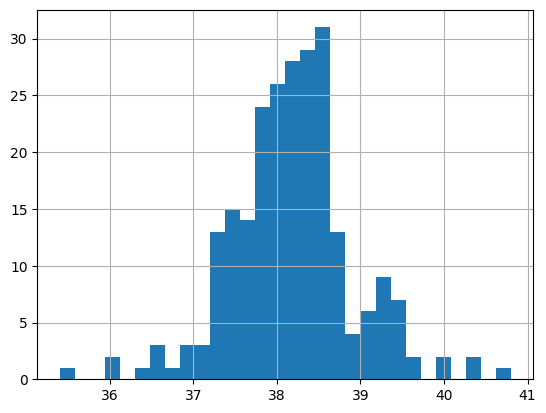

In [155]:
# посмотрим на график распределения температуры
df.rectal_temperature.hist(bins=30)

Распределение близко к нормальному, поэтому пропуска для температуры можно заполнить средним

In [156]:
df.rectal_temperature = df.rectal_temperature.fillna(df.rectal_temperature.mean().round(1))

### *pulse*

In [157]:
# пульс сильно зависит от возраста
df.groupby(df['age']).pulse.mean()

age
1     67.456693
9    123.363636
Name: pulse, dtype: float64

Пропуска для пульса можно заполнить средними для соответствующего возраста

In [158]:
df.pulse = df.pulse.fillna(df.groupby('age').pulse.transform('mean'))

### *respiratory_rate*

In [159]:
# дыхание коррелирует с пульсом
df.groupby(df['pulse'].round(-1)).respiratory_rate.mean()

pulse
30.0     15.000000
40.0     20.837209
50.0     25.404255
60.0     33.771429
70.0     25.965517
80.0     32.700000
90.0     32.777778
100.0    36.647059
110.0    31.444444
120.0    50.000000
130.0    40.000000
140.0    46.666667
150.0    72.666667
160.0    52.000000
180.0    84.000000
Name: respiratory_rate, dtype: float64

Дыхание можно заполнить средними для соответствующего диапазона пульса

In [160]:
df.respiratory_rate = df.respiratory_rate.fillna(df.groupby(df['pulse'].round(-1)).respiratory_rate.transform('mean'))

### *temperature_of_extremities*

In [161]:
# температура конечностей должна зависеть от общей температуры
df.groupby('temperature_of_extremities').rectal_temperature.mean()

temperature_of_extremities
1.0    38.132051
2.0    38.203333
3.0    38.190826
4.0    38.388889
Name: rectal_temperature, dtype: float64

Такой корреляции не видно, поэтому gропуски в *temperature_of_extremities* заполним модой

In [162]:
df.temperature_of_extremities = df.temperature_of_extremities.fillna(df.temperature_of_extremities.mode()[0])

### *pain*

In [163]:
# боль коррелирует с *outcome*
df.groupby(df['outcome']).pain.apply(lambda x: x.mode()[0])

outcome
1.0    3.0
2.0    5.0
3.0    2.0
Name: pain, dtype: float64

заполним пропуски в *pain* модой для соответствующего *outcome*

In [164]:
df.pain.fillna(df.groupby(df['outcome']).pain.transform(lambda x: x.mode()[0]), inplace=True)

In [165]:
# посмотрим теперь количество пропусков
(df.isna().mean() * 100).round(2)

surgery?                      0.0
age                           0.0
rectal_temperature            0.0
pulse                         0.0
respiratory_rate              0.0
temperature_of_extremities    0.0
pain                          0.0
outcome                       0.0
dtype: float64

Я считаю, что зополнять пропуски в данных нельзя, если только пометкой - ни данных, тем более если неизвестна причина появления пропусков. Любое заполнение пропусков может привести к искажению данных.